In [148]:
from astropy.constants import G
import astropy.coordinates as coord
import astropy.units as u
from astropy.time import Time

from IPython.display import display, Math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import argrelmax
from scipy.misc import derivative
from scipy import stats
import sympy as sy

import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic

In [3]:
def nu_z(z,sigma,omega):
    '# of stars as a fn of distance from midplane'
    Phi = 0.5*(omega**2)*(z**2)
    return np.exp(-Phi/(sigma**2))

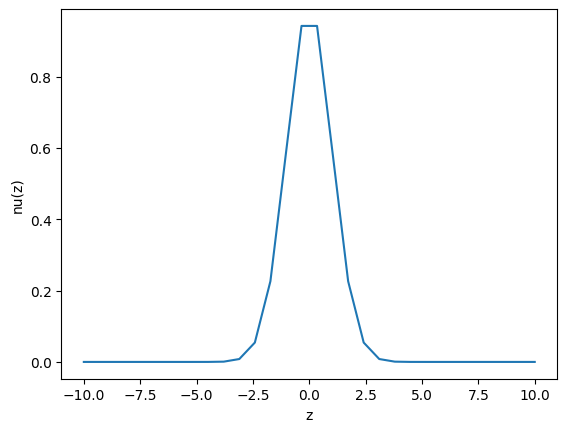

In [6]:
z=np.linspace(-10,10,30)
gaussian_z = nu_z(z,sigma=1,omega=1)
plt.plot(z,gaussian_z)
plt.xlabel('z')
plt.ylabel('nu(z)')
plt.show()

In [7]:
sampled_z = np.random.normal(loc=0.0, scale=1.0, size=100000)
sampled_z

array([0.28283603, 0.2449753 , 0.67726119, ..., 0.6538532 , 0.53383652,
       0.27998514])

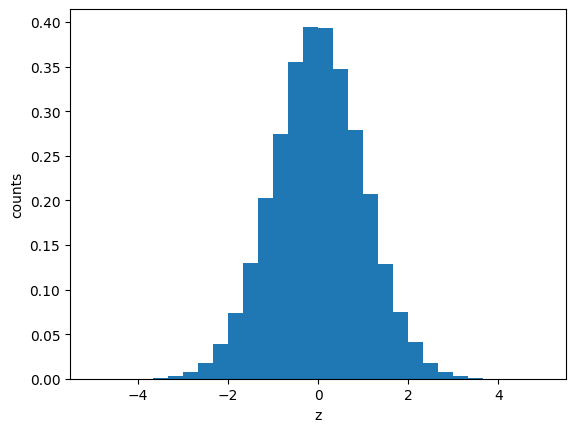

In [54]:
plt.hist(sampled_z, 30, range=(-5, 5), density=True)
plt.xlabel('z')
plt.ylabel('counts')
plt.show()

In [8]:
array1, array2 = np.histogram(sampled_z, bins=30)

In [21]:
bin_width_z = array2[3]-array2[2]
bin_center_z = array2[1:]-bin_width/2

In [23]:
observed_nu_z = array1/bin_width_z

In [ ]:
true_nu_z = nu_z(z, omega)

z=np.linspace(-5,5,30)
true_nu_z = nu_z(z,sigma=1,omega=1)
plt.plot(z,gaussian_z)
plt.xlabel('z')
plt.ylabel('nu(z)')
plt.show()

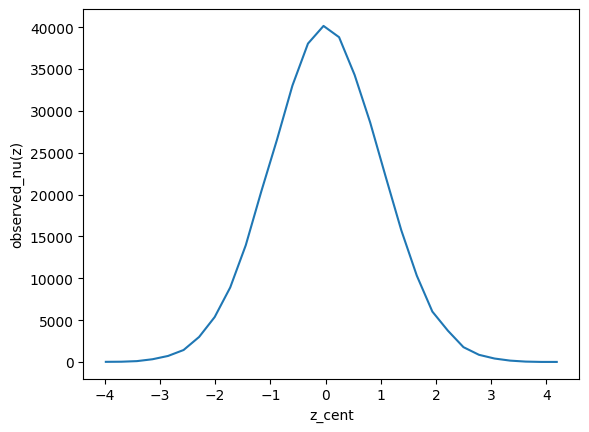

In [24]:
plt.plot(bin_center_z, observed_nu_z)
plt.xlabel('z_cent')
plt.ylabel('observed_nu(z)')
plt.show()

In [12]:
def nu_vz(vz,sigma):
    '# of stars as a fn of vertical motion'
    return np.exp(-0.5*((vz**2)/(sigma**2)))

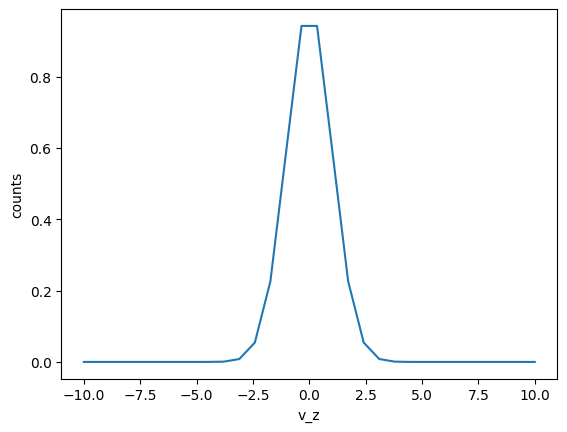

In [15]:
v_z=np.linspace(-10,10,30)
gaussian_vz = nu_vz(v_z,sigma=1)
plt.plot(v_z,gaussian_vz)
plt.xlabel('v_z')
plt.ylabel('counts')
plt.show()

In [16]:
sampled_vz = np.random.normal(loc=0.0, scale=1.0, size=100000)
sampled_vz

array([ 1.18132977, -0.60644927, -0.49580245, ...,  0.60537203,
        0.91886028, -0.93811988])

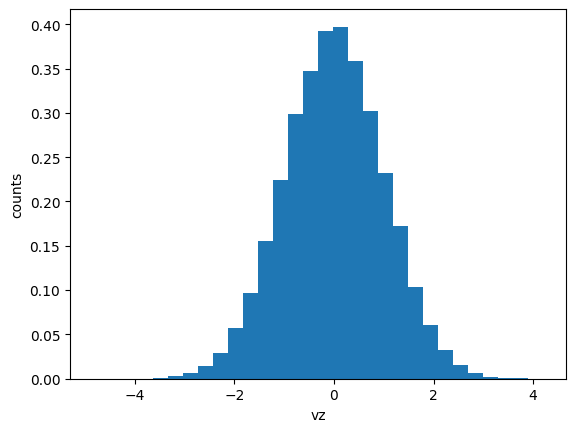

In [55]:
plt.hist(sampled_vz, 30, density=True)
plt.xlabel('vz')
plt.ylabel('counts')
plt.show()

In [18]:
squared = (sampled_vz)**2

In [46]:
mean_vz_squared, bin_edges, binnumber = stats.binned_statistic(sampled_z, squared, statistic='mean', bins=30)

In [47]:
mean_vz_squared

array([0.59053924, 1.26756638, 0.89022185, 1.11074911, 1.02260536,
       0.90955261, 0.93297404, 0.94755551, 0.95141993, 1.01453565,
       1.00343446, 1.01653939, 0.99265109, 1.00250646, 1.00744683,
       1.00699359, 1.00297512, 0.99820039, 1.00330531, 1.00999593,
       0.98711548, 1.03381068, 1.0974059 , 1.01567893, 0.99544182,
       1.08660158, 0.87837296, 1.87366422, 0.56248244, 0.41131337])

In [139]:
len(mean_vz_squared)

30

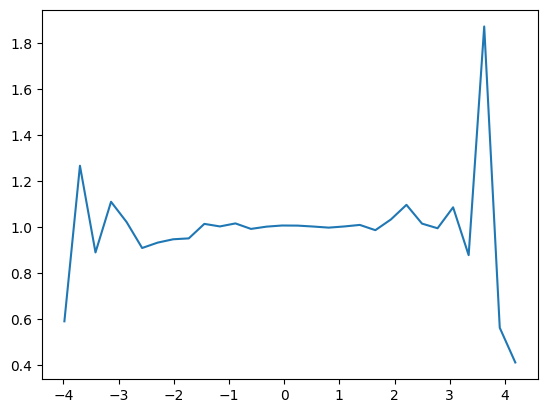

In [146]:
plt.plot(bin_center_z, mean_vz_squared)
plt.show()

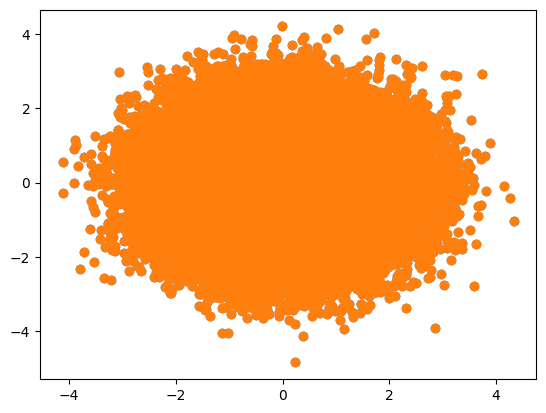

In [142]:
plt.scatter(sampled_z, sampled_vz)
plt.show()

In [48]:
product = (observed_nu_z) * (mean_vz_squared)

In [49]:
d = np.gradient(product,bin_center_z)

In [50]:
d

array([ 1.15107536e+02,  1.45978928e+02,  5.71124423e+02,  1.14638829e+03,
        1.66476855e+03,  3.64779114e+03,  6.71928405e+03,  1.00874062e+04,
        1.60987214e+04,  2.12738767e+04,  2.27217665e+04,  2.18741044e+04,
        1.98536850e+04,  1.36163740e+04,  1.66749520e+03, -1.07418927e+04,
       -1.86540850e+04, -2.16613323e+04, -2.24805729e+04, -2.13329965e+04,
       -1.71857575e+04, -1.07885676e+04, -7.85584224e+03, -5.77129639e+03,
       -2.39926623e+03, -1.25798992e+03, -6.35891952e+02, -2.49539730e+02,
       -1.57536653e+02, -5.71612464e+00])

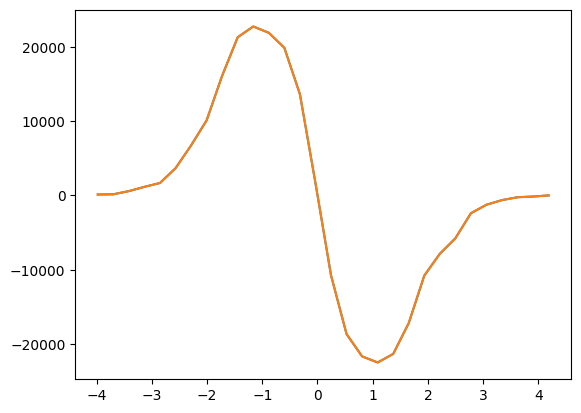

In [145]:
plt.plot(bin_center_z, d)
plt.show()

In [28]:
def true(z,omega):
    'true dPhi/dz'
    return z*(omega**2)

In [51]:
jeans_dPhi_dz = -(d/observed_nu_z)
jeans_dPhi_dz

array([-5.40373157, -4.11179477, -5.36229541, -3.47208261, -2.29860821,
       -2.54325471, -2.24244506, -1.87794055, -1.80658717, -1.52435055,
       -1.11421479, -0.82480434, -0.60111749, -0.35787347, -0.04152454,
        0.27677219,  0.54381124,  0.75671051,  1.01590127,  1.35426512,
        1.66576728,  1.79070152,  2.09939134,  3.25120708,  2.79257171,
        3.02853471,  3.81089277,  5.0205688 , 14.79113899,  0.53668776])

In [52]:
true_dPhi_dz = true(z,omega=1)

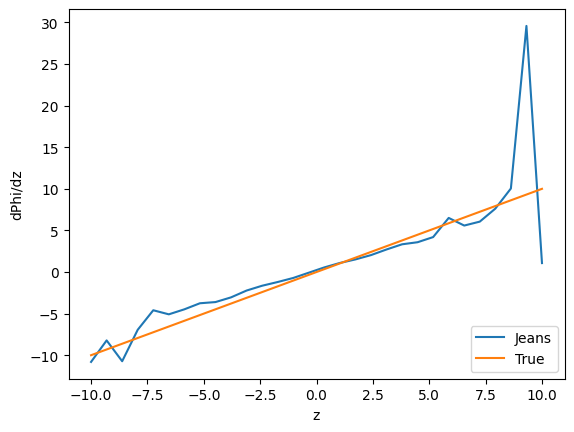

In [147]:
plt.plot(z,2*jeans_dPhi_dz)
plt.plot(z, true_dPhi_dz)
plt.legend(["Jeans", "True"], loc ="lower right")
plt.xlabel('z')
plt.ylabel('dPhi/dz')
plt.show()

In [67]:
from astropy.constants import G
import astropy.coordinates as coord
import astropy.units as u
from astropy.time import Time

from IPython.display import display, Math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import argrelmax
import sympy as sy

import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic

In [72]:
def accel_sho(z, omega):
    return -(z)*(omega)**2
    

In [69]:
def leapfrog_integrate(acc_func, x0, v0, dt, n_steps, acc_func_args=()):
    """
    Parameters
    ----------
    acc_func : callable
        A function that computes the acceleration at a position.
    x0 : quantity-like [length]
        Initial position.
    v0 : quantity-like [velocity]
        Initial velocity.
    dt : quantity-like [time]
        Timestep.
    n_steps : int
        The number of timesteps to take.
    acc_func_args : iterable, list (optional)
        Any additional arguments to be passed to the `acc_func` function.
    """
    # Make sure the input initial conditions and timestep are valid:
    x0 = u.Quantity(x0)
    v0 = u.Quantity(v0)
    ts = u.Quantity(dt) * np.arange(int(n_steps) + 1)

    # Initialize the velocity: step forward by 1/2 timestep
    a0 = acc_func(x0, *acc_func_args)
    v_1_2 = v0 + a0 * dt / 2.0

    # Set up array Quantity objects to store the full orbits for both
    # position and velocity
    xs = np.full((3, len(ts)), np.nan) * x0.unit
    xs[:, 0] = x0
    vs = np.full((3, len(ts)), np.nan) * v0.unit
    vs[:, 0] = v0

    x_im1 = x0
    v_im1_2 = v_1_2
    for i in range(n_steps):
        x_i = x_im1 + v_im1_2 * dt
        a_i = acc_func(x_i, *acc_func_args)

        v_i = v_im1_2 + a_i * dt / 2
        v_ip1_2 = v_i + a_i * dt / 2

        xs[:, i + 1] = x_i
        vs[:, i + 1] = v_i

        x_im1 = x_i
        v_im1_2 = v_ip1_2

    return ts, xs, vs

In [75]:
#w0 = np.array([0,6])
#mass = 1*u.kg
#l    = 1*u.meter
#p1 = particle(name='particle1',w0=w0)
lf_ts, lf_xs, lf_vs = leapfrog_integrate(accel_sho, sampled_z[0], sampled_vz[0], dt=.01 , n_steps=10000, acc_func_args=(1,)
)

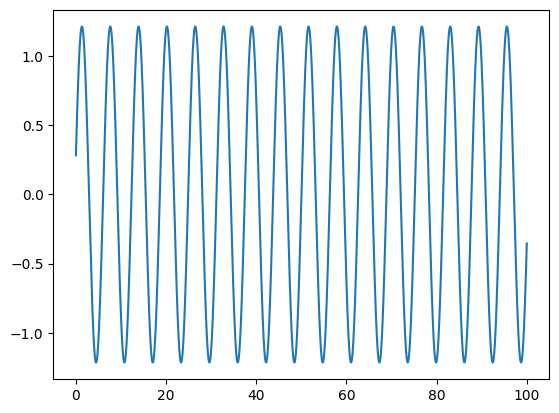

In [82]:
plt.plot(lf_ts, lf_xs[2])
plt.show()

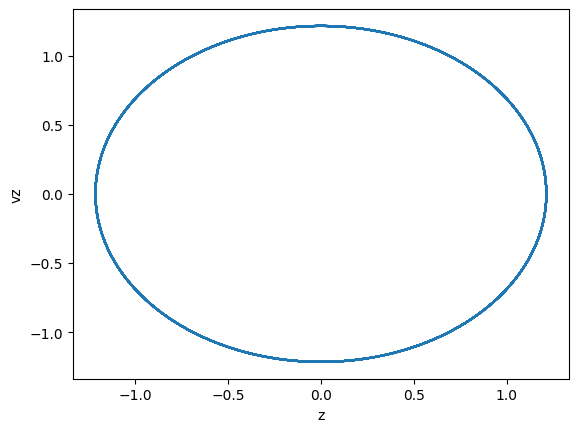

In [128]:

# x-y
plt.plot(lf_xs[2], lf_vs[2])
plt.xlabel('z')
plt.ylabel('vz')

plt.show()

In [129]:
def pot_sho(z, omega):
    return 0.5*(omega**2)*(z**2)

In [130]:
pot = pot_sho(lf_xs[2,:], omega=1)

In [131]:
E = pot + 0.5 * (lf_vs[2,:]) ** 2

In [119]:
#E_final = pot_sho(lf_xs[2,:], omega=1) + 0.5 * (lf_vs[2,:])**2

In [120]:
dE = np.abs((E[1:] - E[0]) / E[0])

In [121]:
#dE = np.abs((E_final - E) / E)

In [122]:
dE

<Quantity [1.15444010e-07, 2.35299700e-07, 3.59519129e-07, ...,
           1.05248907e-06, 9.07003715e-07, 7.65613421e-07]>

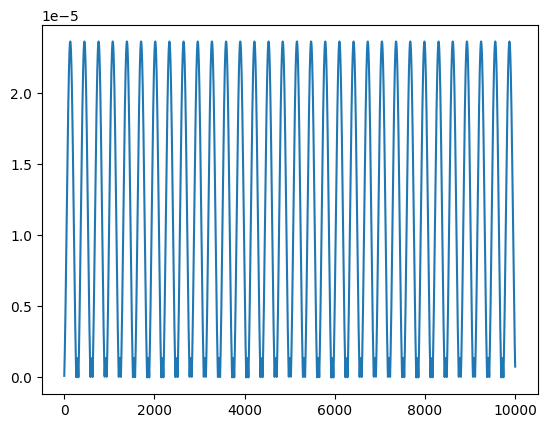

In [127]:
plt.plot(dE)
plt.show()

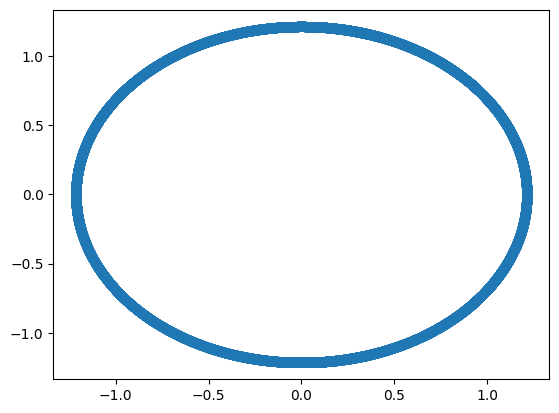

In [134]:
plt.scatter(lf_xs[2], lf_vs[2])
plt.show()

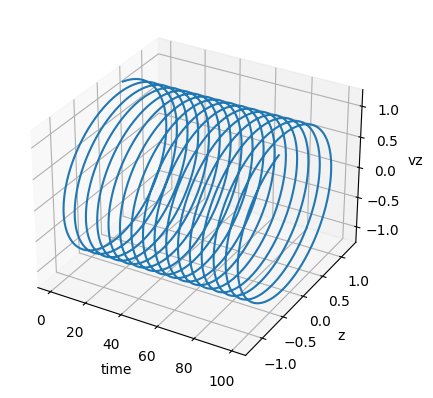

In [138]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(lf_ts, lf_xs[2], lf_vs[2])
ax.set_xlabel('time')
ax.set_ylabel('z')
ax.set_zlabel('vz')
plt.show()